In [6]:
from utils.dist_matrix import PDB_Features #parse_pdb, pairwise_distance_matrix

pdb_file = '/mnt/Archive/PDB/pdb3noy.ent'

pdb_obj = PDB_Features()

pdb_obj.parse_pdb(pdb_file)


Parsing /mnt/Archive/PDB/pdb3noy.ent ...


In [7]:
print(pdb_obj.b_coords.keys())

dict_keys(['A', 'B', 'C', 'D'])


In [5]:
import tensorflow as tf

cross = tf.keras.losses.BinaryCrossentropy()

y = tf.constant([1])
y_hat = tf.constant([0.9])

print(cross(y, y_hat))

tf.Tensor(0.10536041, shape=(), dtype=float32)


In [3]:
import math
print(math.log(0.7))

-0.35667494393873245


In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [8]:
import tensorflow as tf
const_x = tf.constant([[[1,2],[1,2],[1,2],[1,2],[1,2],[1,2]],[[1,2],[1,2],[1,2],[1,2],[1,2],[1,2]]])
print(tf.shape(const_x))
const_w = tf.constant([[1,1,1,0,0,0], [1,1,0,0,0,0]])
const_w = tf.reshape(const_w, shape=(2,6,1))
const_w = tf.repeat(const_w, repeats=2, axis=2)
print(tf.math.multiply(const_x,const_w))
#t_const = tf.stack(const)

tf.Tensor([2 6 2], shape=(3,), dtype=int32)
tf.Tensor(
[[[1 2]
  [1 2]
  [1 2]
  [0 0]
  [0 0]
  [0 0]]

 [[1 2]
  [1 2]
  [0 0]
  [0 0]
  [0 0]
  [0 0]]], shape=(2, 6, 2), dtype=int32)


In [11]:
import numpy as np 

z1 = np.array([[1,2],[1,3]])
z2 = np.array([[1,3],[1,2]])
z = zip(z1,z2)
for i in z:
    print(i)


(array([1, 2]), array([1, 3]))
(array([1, 3]), array([1, 2]))


In [12]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [34]:
import tensorflow as tf
import tensorflow_addons as tfa
from utils import preprocessing as pre

dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'

names_class = ['ogt_4_15.fasta', 'ogt_26_37.fasta', 'ogt_48_59.fasta', 'ogt_70_81.fasta']
names_reg = ['ogt_4_15.fasta', 'ogt_15_26.fasta', 'ogt_26_37.fasta', 'ogt_37_48.fasta', 'ogt_48_59.fasta', 'ogt_59_70.fasta', 'ogt_70_81.fasta']


#data_train, data_val = pre.prepare_dataset_reg(dir_, names_reg,seq_length = 512,t_v_split = 0.1,max_samples = 700)

#x_train = data_train.shuffle(buffer_size = 7000).batch(64, drop_remainder=True) 
#x_val = data_val.shuffle(buffer_size = 7000).batch(64, drop_remainder=True)

x = tf.constant([[0, 0, 1, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0],[0, 1, 0, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0]], dtype=tf.float32)

noise = tf.keras.layers.GaussianNoise(1.0)
sfm   = tf.keras.layers.Softmax(axis=-1)
x = noise(x*5, True)
print(x.numpy())
print(sfm(x).numpy())
print(tf.math.tanh(x))
"""
norm_I = tfa.layers.InstanceNormalization(beta_initializer='zeros' ,gamma_initializer="ones")
norm_B = tf.keras.layers.BatchNormalization(beta_initializer='zeros' ,gamma_initializer="ones")
norm_L = tf.keras.layers.LayerNormalization(beta_initializer='zeros' ,gamma_initializer="ones")
for i, batch in enumerate(x_train):
    print(norm_I(batch[0].numpy()))
    print(norm_B(batch[0].numpy()))
    print(norm_L(batch[0].numpy()))
    break
"""

[[ 1.0107068   0.32356328  4.665213    1.5130591  -0.67706996  1.1051533
   0.4209537  -0.08746843  0.50248766  0.4810901   0.91254205 -0.5190129
  -1.2713071   0.62562406  1.3677851   0.16221178 -0.8852673   0.04397293
   1.520272    2.8300133 ]
 [-0.43514097  4.8007693   0.31030488 -1.0824617   0.64300966 -0.3672495
  -0.8494483   0.05788492  0.19099395 -0.52630484  0.49610126 -2.0529504
   1.8891007  -0.12361313 -0.556635   -2.107251    0.8517825  -0.343
   0.4806744  -1.9603109 ]]
[[1.7454512e-02 8.7798061e-03 6.7458951e-01 2.8845396e-02 3.2278653e-03
  1.9183386e-02 9.6779000e-03 5.8207121e-03 1.0500038e-02 1.0277749e-02
  1.5822506e-02 3.7805834e-03 1.7817289e-03 1.1875952e-02 2.4945069e-02
  7.4715549e-03 2.6211783e-03 6.6383546e-03 2.9054204e-02 1.0765207e-01]
 [4.4752713e-03 8.4090388e-01 9.4311032e-03 2.3425641e-03 1.3153891e-02
  4.7896556e-03 2.9572500e-03 7.3271943e-03 8.3704004e-03 4.0853331e-03
  1.1356716e-02 8.8759261e-04 4.5732468e-02 6.1110258e-03 3.9632842e-03
  8.4

'\nnorm_I = tfa.layers.InstanceNormalization(beta_initializer=\'zeros\' ,gamma_initializer="ones")\nnorm_B = tf.keras.layers.BatchNormalization(beta_initializer=\'zeros\' ,gamma_initializer="ones")\nnorm_L = tf.keras.layers.LayerNormalization(beta_initializer=\'zeros\' ,gamma_initializer="ones")\nfor i, batch in enumerate(x_train):\n    print(norm_I(batch[0].numpy()))\n    print(norm_B(batch[0].numpy()))\n    print(norm_L(batch[0].numpy()))\n    break\n'

In [12]:

import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]= ""
currentdir = os.path.dirname(os.getcwd())
print(currentdir)
parentdir = os.path.dirname(currentdir)
print(parentdir)
sys.path.append(currentdir)
from utils.layers_new import GumbelSoftmax

obj = GumbelSoftmax(temperature = 0.3)

/home/sandra/Documents/PHD_projects/Cycle_gan
/home/sandra/Documents/PHD_projects


In [17]:
import tensorflow as tf
constant1 = tf.constant([[1, 2, 3],[1, 2, 3]], dtype=tf.float32)
print(obj(constant1))

tf.Tensor(
[[0.00207049 0.4429086  0.55502087]
 [0.16598032 0.8232698  0.0107499 ]], shape=(2, 3), dtype=float32)


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#g = -tf.math.log(-tf.math.log(tf.random.uniform(tf.constant([1000,]), minval=0, maxval=1, dtype=tf.dtypes.float32)))

sm = tf.keras.layers.Softmax(axis=-1)

logit = tf.constant([[5,4 , 3],[9.9, 10, 9.8]], dtype=tf.float32)
p = sm(logit)
print(logit)
print(p)
#hist = np.zeros((3,))
#for i in range(100):
hist = obj(logit).numpy()
print(hist)    
#plt.hist(g)
#plt.show()

tf.Tensor(
[[ 5.   4.   3. ]
 [ 9.9 10.   9.8]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.66524094 0.24472848 0.09003057]
 [0.3322249  0.36716542 0.30060968]], shape=(2, 3), dtype=float32)
[[9.9999547e-01 4.5321272e-06 3.6660929e-08]
 [9.0746337e-01 2.4019338e-02 6.8517320e-02]]


In [5]:
import yaml
file = "config.yaml"
with open(file, 'r') as file_descriptor:
    data = yaml.load(file_descriptor, Loader=yaml.FullLoader)
    
print(type(data["CycleGan"]['Generator']['filters']))

<class 'list'>


In [1]:
import os, sys
currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir) 
import utils.preprocessing as pre

seq = "abhkcsea"

print(pre.to_binary(seq, max_length=10))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


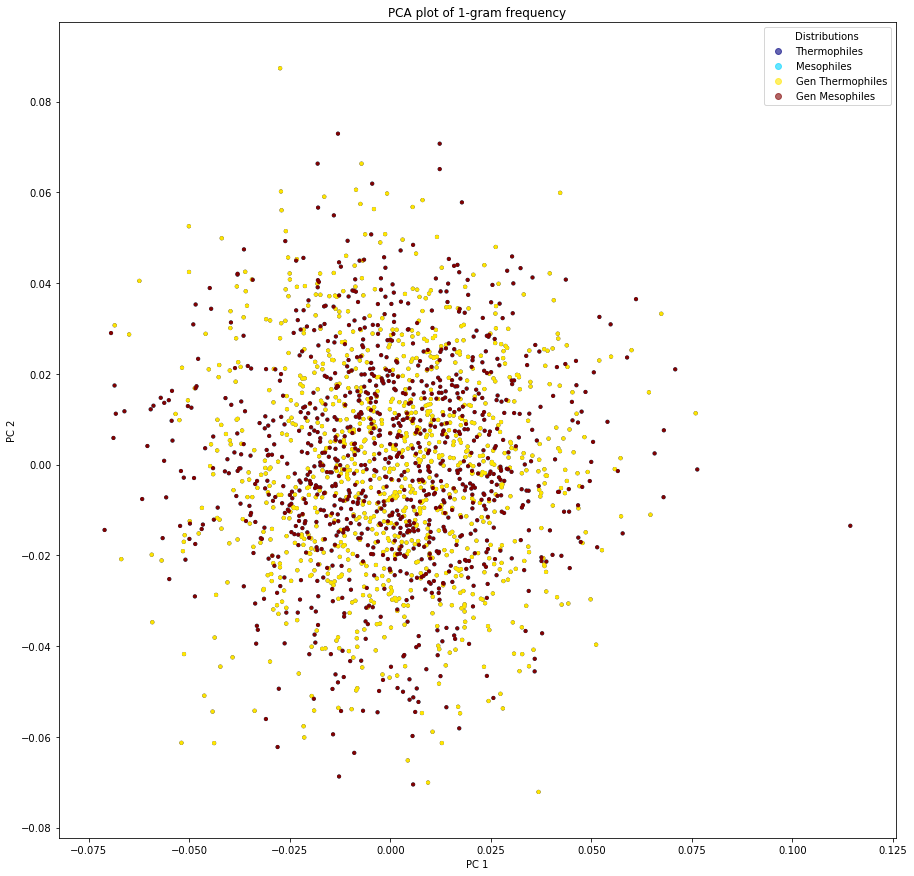

<Figure size 432x288 with 0 Axes>

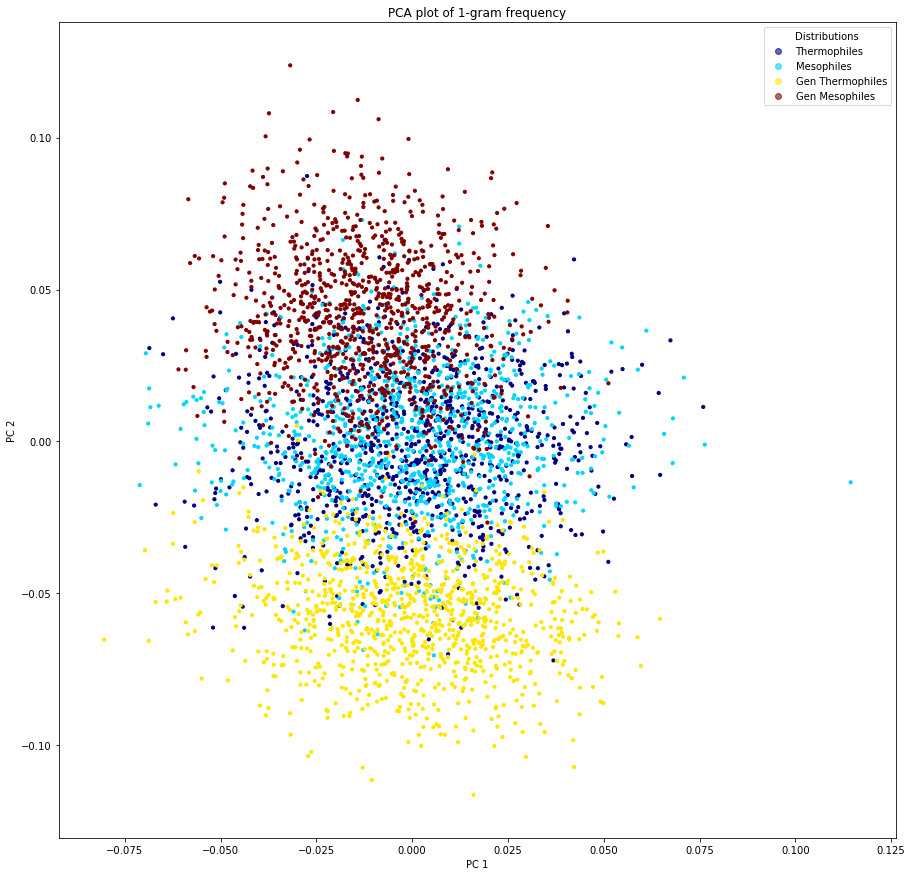

<Figure size 432x288 with 0 Axes>

In [7]:
import os, sys
currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir)

import numpy as np
import tensorflow as tf
from utils import callbacks
from utils.preprocessing import to_binary

AAS_1 = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q']
AAS_2 = ['I','K','L','M','N','P','Q','R','S','T','V','W','Y','X']

data_thermo = np.random.choice(AAS, size=[1000,100])
w_thermo = np.ones_like(data_thermo, dtype=np.float32)
data_thermo = np.array([to_binary(np.sum(i.astype(object)), max_length=100) for i in data_thermo])

data_meso = np.random.choice(AAS, size=[1000,100])
w_meso = np.ones_like(data_meso, dtype=np.float32)
data_meso = np.array([to_binary(np.sum(i.astype(object)), max_length=100) for i in data_meso])

 

dataset_thermo = tf.data.Dataset.from_tensor_slices((data_thermo,data_thermo, w_thermo))
dataset_meso = tf.data.Dataset.from_tensor_slices((data_meso,data_meso, w_meso))

data_thermo = np.random.choice(AAS_1, size=[1000,100])
w_thermo = np.ones_like(data_thermo, dtype=np.float32)
data_thermo = np.array([to_binary(np.sum(i.astype(object)), max_length=100) for i in data_thermo])

data_meso = np.random.choice(AAS_2, size=[1000,100])
w_meso = np.ones_like(data_meso, dtype=np.float32)
data_meso = np.array([to_binary(np.sum(i.astype(object)), max_length=100) for i in data_meso])



data_t = zip(data_thermo, data_thermo, w_thermo)
data_m = zip(data_meso, data_meso, w_meso)

cb = callbacks.PCAPlot(dataset_thermo, dataset_meso, 1000, 1000) 
cb(data_t, data_m, 1000, 1000, 1)    

In [4]:
print(w_thermo)

[['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']]
